In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#2330:TSMC
from FinMind.Data import Load
TaiwanStockInfo = Load.FinData(dataset = 'TaiwanStockInfo')
data = Load.FinData(dataset = 'TaiwanStockPrice',select = '2330',date = '2018-01-01')

In [14]:
data

,date,stock_id,Trading_Volume,Trading_money,open,max,min,close,spread,Trading_turnover
0,2018-01-02,2330,18055269,4188555408,231.5,232.5,231.0,232.5,3.0,9954.0
1,2018-01-03,2330,31706091,7504382512,236.0,238.0,235.5,237.0,4.5,13633.0
2,2018-01-04,2330,29179613,6963192636,240.0,240.0,236.5,239.5,2.5,10953.0
3,2018-01-05,2330,23721255,5681934695,240.0,240.0,238.0,240.0,0.5,8659.0
4,2018-01-08,2330,21846692,5281823362,242.0,242.5,240.5,242.0,2.0,10251.0
...,...,...,...,...,...,...,...,...,...,...
732,2020-12-30,2330,46705107,24306881615,516.0,525.0,514.0,525.0,10.0,33173.0
733,2020-12-31,2330,30326332,15989936054,526.0,530.0,524.0,530.0,5.0,25134.0
734,2021-01-04,2330,39309959,21030671248,530.0,540.0,528.0,536.0,6.0,33314.0
735,2021-01-05,2330,34839391,18761831567,536.0,542.0,535.0,542.0,6.0,28512.0


C:\Users\_\anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


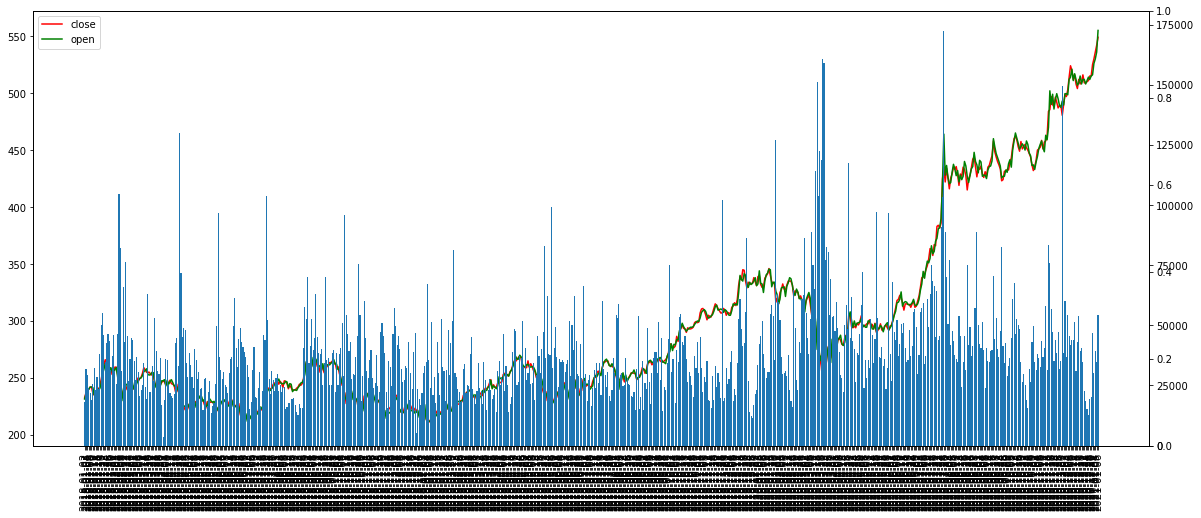

In [15]:
fig=plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)  
ax1 = fig.add_subplot(111)
ax1.plot(data.close,color='red',label='close')
ax1.plot(data.open,color='green',label='open')
plt.legend()
# twin 為共享x軸
ax2= ax1.twinx()
plt.bar(data.date,data.Trading_Volume.astype('int')//1000)
ax3 = ax1.twinx()
plt.savefig('2330_year.png')

In [16]:
#切分Test集
test = data[data.date>'2019-09-01']
train = data[:len(data)-len(test)]
#只要open high
train_set = train['open']
test_set = test['open']

In [17]:
from sklearn.preprocessing import MinMaxScaler 
sc = MinMaxScaler(feature_range = (0, 1))
#需將資料做reshape的動作，使其shape為(資料長度,1) 
train_set= train_set.values.reshape(-1,1)
training_set_scaled = sc.fit_transform(train_set)

In [18]:
X_train = [] 
y_train = []
for i in range(10,len(train_set)):
    X_train.append(training_set_scaled[i-10:i-1, 0]) 
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train) 
X_train = np.reshape(X_train, 
                         (X_train.shape[0], X_train.shape[1], 1))

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout,BatchNormalization

In [41]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100, input_shape = (X_train.shape[1], 1)))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [42]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
396/396 [==============================] - 0s 917us/step - loss: 0.0615 - accuracy: 0.0025
Epoch 2/100
396/396 [==============================] - 0s 320us/step - loss: 0.0184 - accuracy: 0.0051
Epoch 3/100
396/396 [==============================] - 0s 317us/step - loss: 0.0166 - accuracy: 0.0051
Epoch 4/100
396/396 [==============================] - 0s 320us/step - loss: 0.0156 - accuracy: 0.0051
Epoch 5/100
396/396 [==============================] - 0s 322us/step - loss: 0.0155 - accuracy: 0.0051
Epoch 6/100
396/396 [==============================] - 0s 348us/step - loss: 0.0152 - accuracy: 0.0051
Epoch 7/100
396/396 [==============================] - 0s 343us/step - loss: 0.0142 - accuracy: 0.0051
Epoch 8/100
396/396 [==============================] - 0s 315us/step - loss: 0.0134 - accuracy: 0.0051
Epoch 9/100
396/396 [==============================] - 0s 317us/step - loss: 0.0130 - accuracy: 0.0051
Epoch 10/100
396/396 [==============================] - 0s 320us/step - l

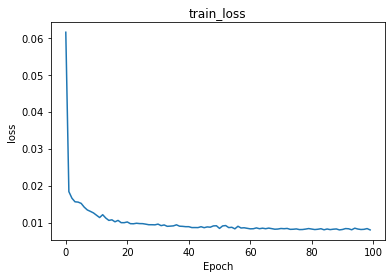

In [43]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [23]:
dataset_total = pd.concat((train['open'], test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

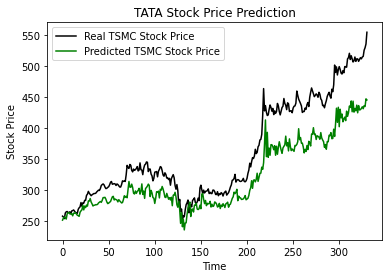

In [24]:
plt.plot(test['open'].values, color = 'black', label = 'Real TSMC Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TSMC Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')

In [25]:
keras.backend.clear_session()
regressor = Sequential()
regressor.add(LSTM(units = 100,return_sequences=True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100,activation='relu'))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 9, 100)            40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
396/396 [==============================] - 1s 2ms/step - loss: 0.0684
Epoch 2/100
396/396 [==============================] - 0s 642us/step - loss: 0.0213
Epoch 3/100
396/396 [==============================] - 0s 639us/step - loss: 0.0186
Epoch 4/100
396/396 [==============================] - 0s 632us/step - loss: 0.0177
Epoch 5/100
396/396 [==============================] - 0s 645us/step - loss: 0.0168
Epoch 6/100
396/396 [==============================] - 0s 660us/step - loss: 0.0154
Epoch 7/100
396/396 [==============================] - 0s 677us/step - loss: 0.0143
Epoch 8/100
396/396 [==============================] - 0s 645us/step - loss: 0.0152
Epoch 9/100
396/396 [==============================] - 0s 644us/step - loss: 0.0134
Epoch 10/100
396/396 [==============================] - 0s 642us/step - loss: 0.0130
Epoch 11/100
396/396 [==============================] - 0s 645us/step - loss: 0.0147
Epoch 12/100
396/396 [==============================] - 0s 640us/step - loss

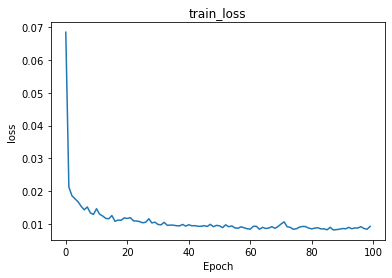

In [29]:
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 16)
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.plot( history.history["loss"])

In [30]:
dataset_total = pd.concat((train['open'], test['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 10:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(10, len(inputs)):
    X_test.append(inputs[i-10:i-1, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
#使用sc的 inverse_transform將股價轉為歸一化前
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

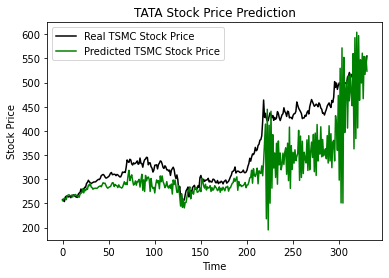

In [31]:
plt.plot(test['open'].values, color = 'black', label = 'Real TSMC Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TSMC Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
# plt.savefig('lstm_2330.png')